## 1.加载数据

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('diabetes.csv')
print("dataset shape:{}".format(data.shape))
data.head()

dataset shape:(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [10]:
# 分离出特征值X与目标值y
X = data.iloc[:,0:8]
y = data.iloc[:,8]
print("shape of X {};\nshape of y {}".format(X.shape,y.shape))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

shape of X (768, 8);
shape of y (768,)


## 2.模型比较

In [13]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("kNN with weight",KNeighborsClassifier(n_neighbors=2,weights='distance')))
models.append(('Radius Neighbour',RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))
# 分别训练3个模型，并计算得分
results = []
for name,model in models:
    model.fit(X_train,y_train)
    results.append((name,model.score(X_test,y_test)))
for i in range(len(results)):
    print("name:{};score:{}".format(results[i][0],results[i][1]))

name:KNN;score:0.6883116883116883
name:kNN with weight;score:0.6818181818181818
name:Radius Neighbour;score:0.6103896103896104


In [16]:
# 使用交叉验证对比算法的准确性
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


results = []

for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X,y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print("name:{};cross val score:{}".format(results[i][0],results[i][1].mean()))

name:KNN;cross val score:0.7147641831852358
name:kNN with weight;cross val score:0.6770505809979495
name:Radius Neighbour;cross val score:0.6497265892002735


## 3.模型训练

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)
print("train score:{};\ntest score:{}".format(train_score,test_score))

train score:0.8436482084690554;
test score:0.6883116883116883


In [35]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    

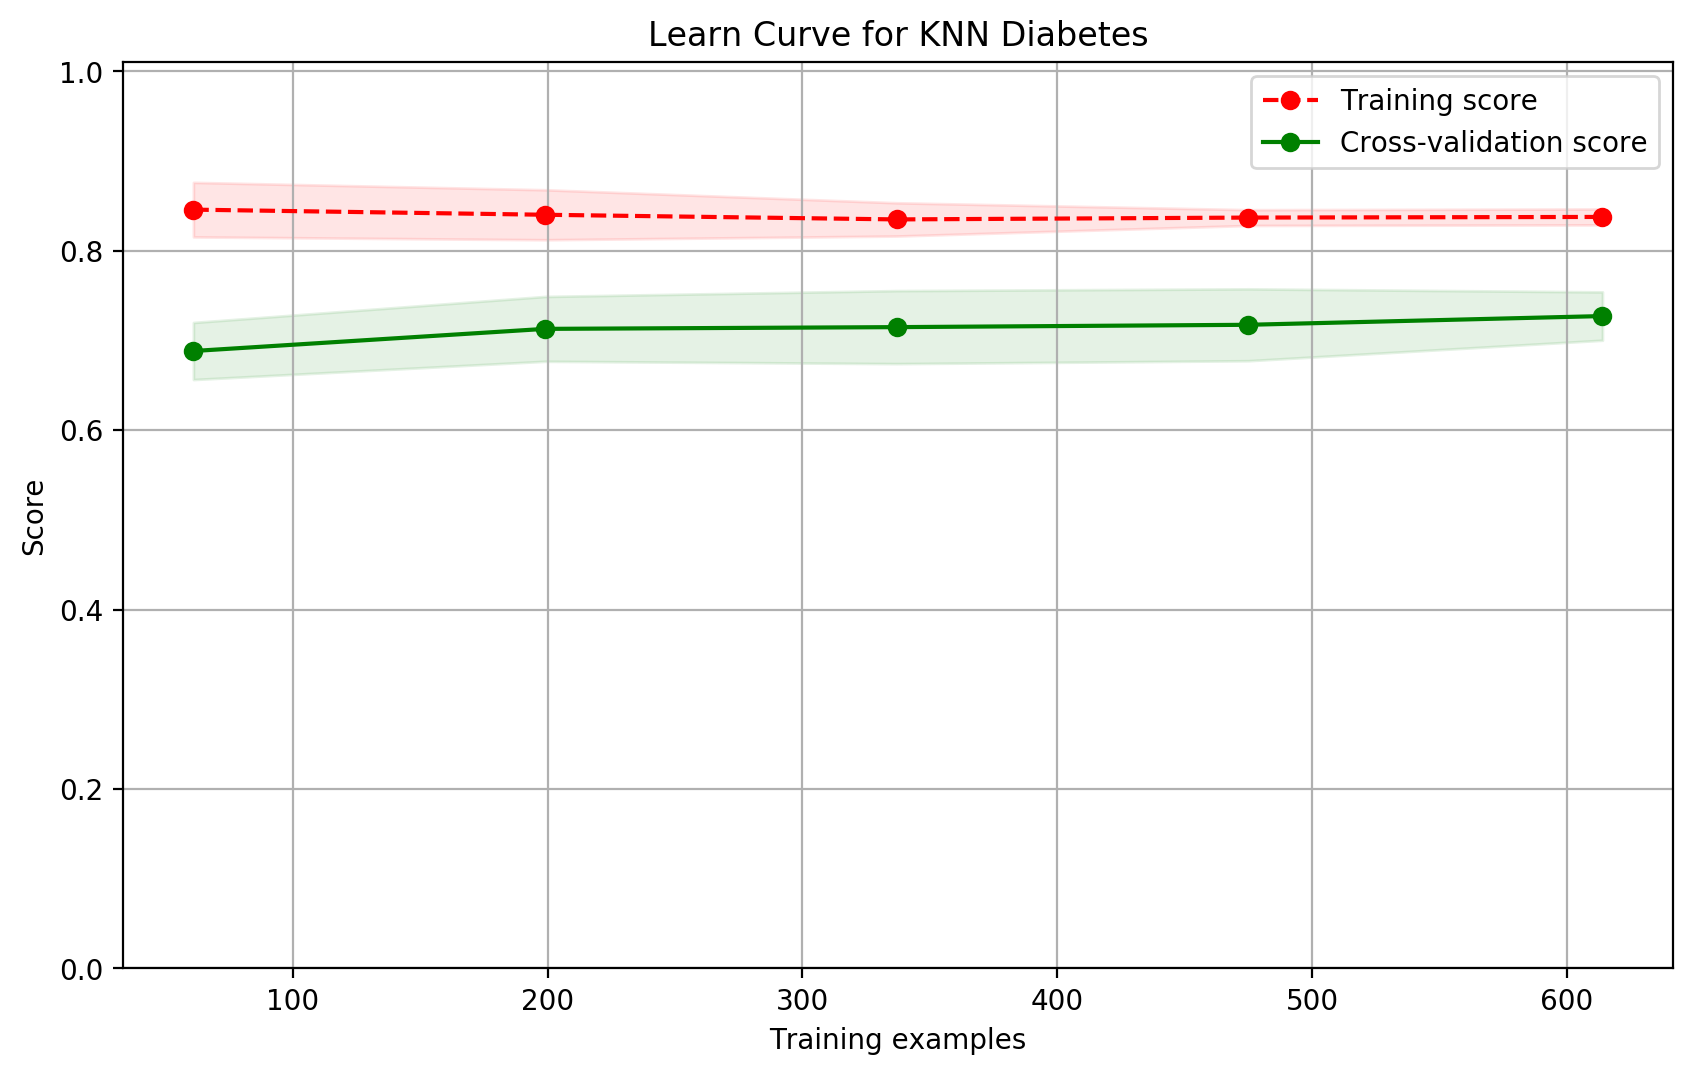

In [36]:
# 画学习曲线进行分析
from sklearn.model_selection import ShuffleSplit

knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6), dpi=200)
plot_learning_curve(plt, knn, "Learn Curve for KNN Diabetes", 
                    X,y, ylim=(0.0, 1.01), cv=cv);


In [37]:
from sklearn.feature_selection import SelectKBest
# 选出两个与输出值相关性最大的特征值
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X,y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [38]:
results = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X_new,y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print("name:{};cross val score:{}".format(results[i][0],results[i][1].mean()))

name:KNN;cross val score:0.725205058099795
name:kNN with weight;cross val score:0.6900375939849623
name:Radius Neighbour;cross val score:0.6510252904989747


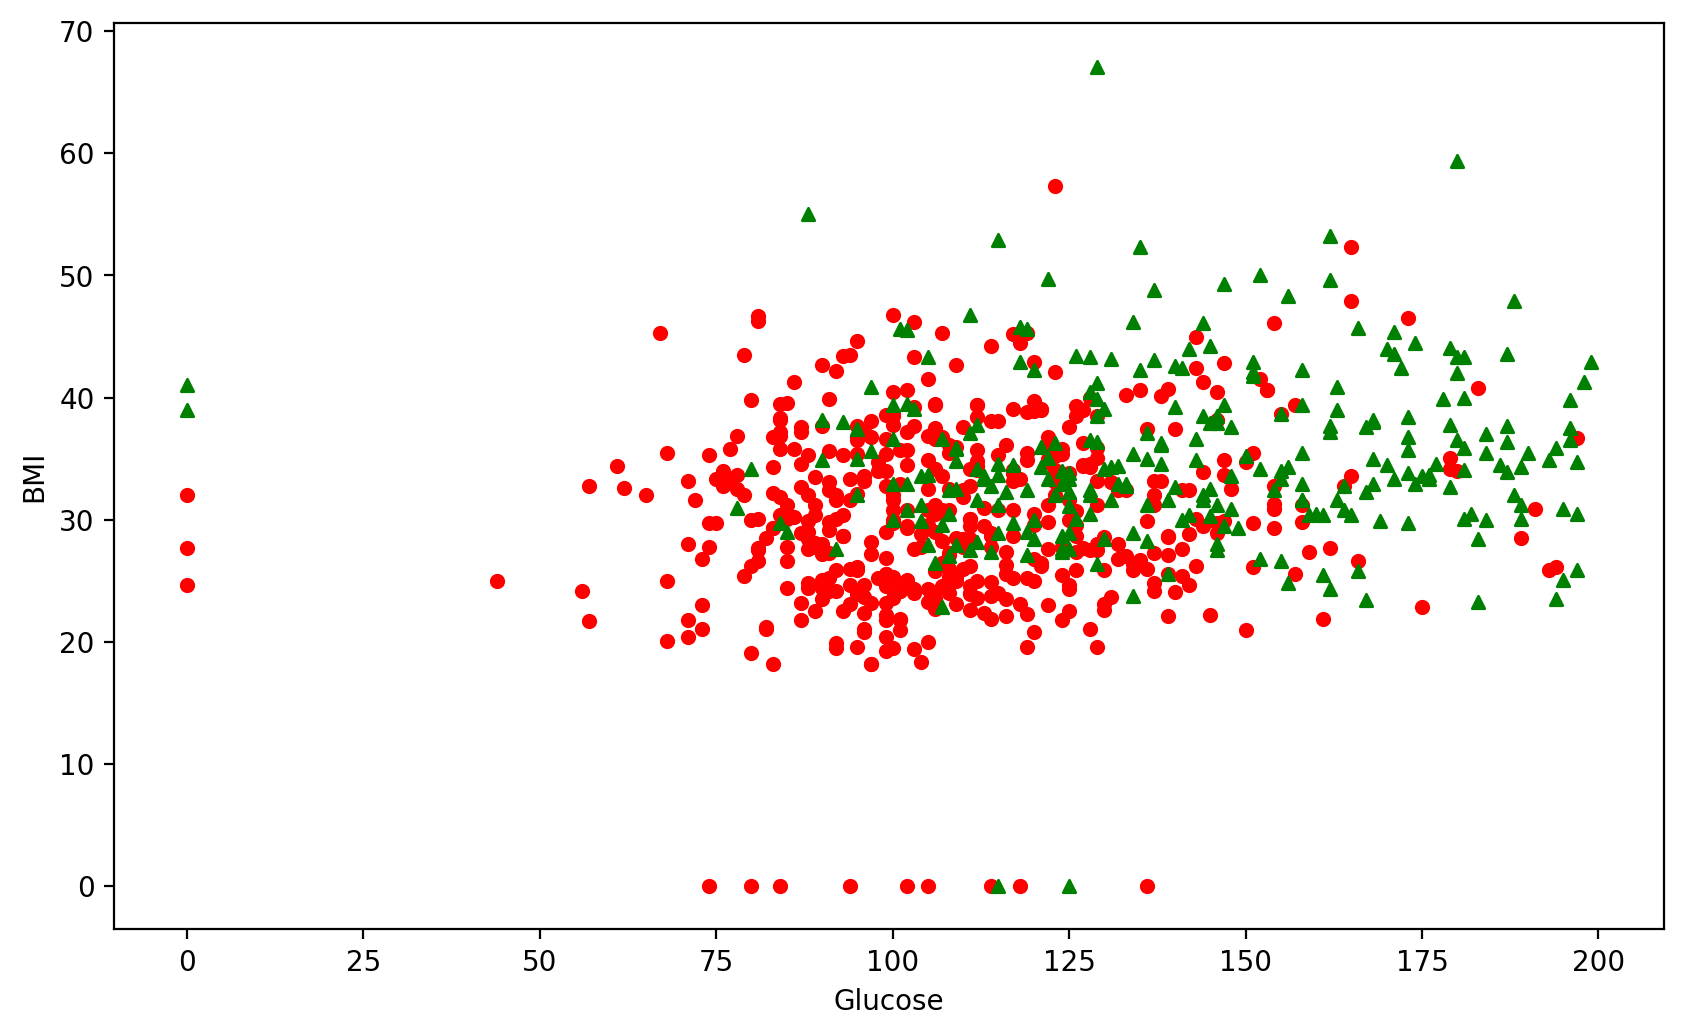

In [41]:
plt.figure(figsize=(10,6),dpi=200)
plt.ylabel('BMI')
plt.xlabel("Glucose")
# 画出 y==0 的阴性样本，用圆圈表示
plt.scatter(X_new[y==0][:,0],X_new[y==0][:,1],c='r',s=20,marker='o')
# 画出Y==1的阳性样本，用三角形表示
plt.scatter(X_new[y==1][:,0],X_new[y==1][:,1],c='g',s=20,marker='^')

## 约会网站预测

### 1.准备数据